In [395]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [397]:
# Load the data
file_path = 'Sexual Harassment Data for Machine Learning Project (2).xlsx'
data = pd.read_excel(file_path)

Class Counts:
 Class
Safe      134
Unsafe     65
Name: count, dtype: int64

Class Percentages:
 Class
Safe      67.336683
Unsafe    32.663317
Name: proportion, dtype: float64


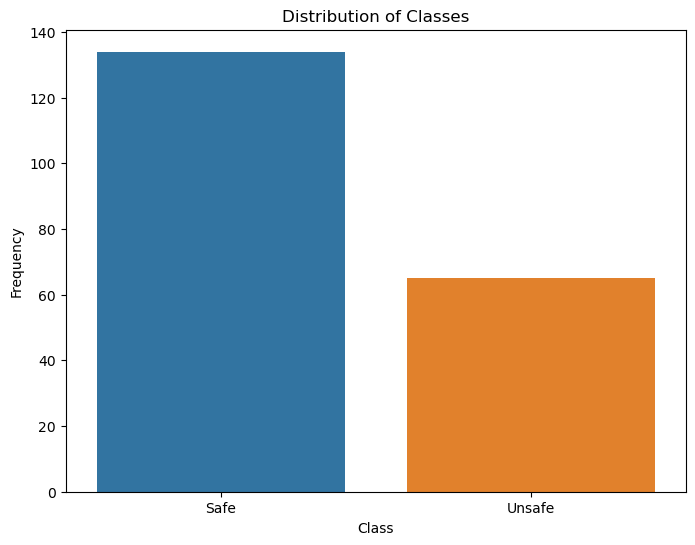

In [399]:
# Check dataset balance
class_counts = data['Class'].value_counts()
class_percentages = data['Class'].value_counts(normalize=True) * 100

print('Class Counts:\n', class_counts)
print('\nClass Percentages:\n', class_percentages)

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes')
plt.show()

In [400]:
# Encode categorical variables
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [403]:
# Define features and target variable
X = data.drop('Class', axis=1).values
y = data['Class'].values
print(len(X))

199


In [405]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [407]:
# Convert y and y_resampled to pandas Series
y_resampled_series = pd.Series(y_resampled)
y_series = pd.Series(y)

In [409]:
# Check the new class distribution
print('Original dataset class distribution:\n', y_series.value_counts())
print('Resampled dataset class distribution:\n', y_resampled_series.value_counts())

Original dataset class distribution:
 0    134
1     65
Name: count, dtype: int64
Resampled dataset class distribution:
 0    134
1    134
Name: count, dtype: int64


In [411]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [413]:
# Add a bias term (column of ones) to the features
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [415]:
# Initialize weights
weights = np.zeros(X_train.shape[1])

In [417]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [419]:
# Cost function (log loss)
def cost_function(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [421]:
# Gradient descent
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        h = sigmoid(np.dot(X, weights))
        weights -= (learning_rate/m) * np.dot(X.T, (h - y))
        cost = cost_function(X, y, weights)
        cost_history.append(cost)
    
    return weights, cost_history

In [423]:
# Training the model
learning_rate = 0.01
iterations = 10000
weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

In [424]:
# Make predictions
y_pred_prob = sigmoid(np.dot(X_test, weights))
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred_prob]

In [427]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [429]:
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.80      0.92      0.86        13

    accuracy                           0.90        40
   macro avg       0.88      0.91      0.89        40
weighted avg       0.91      0.90      0.90        40



In [431]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

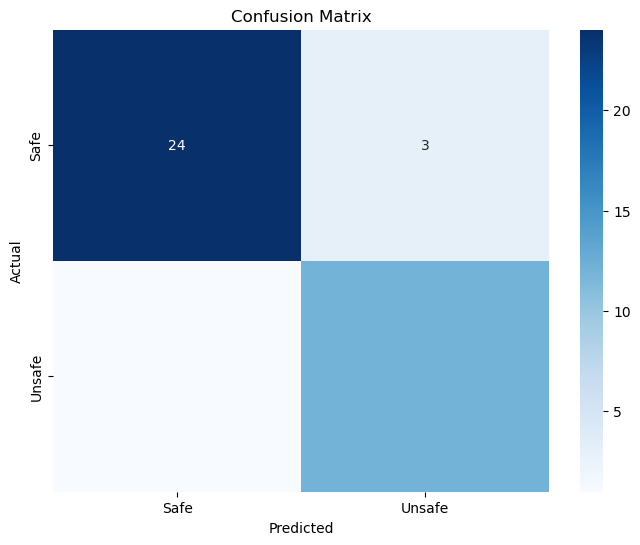

In [433]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Class'].classes_, yticklabels=label_encoders['Class'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# plt.show()
new_data = {
    'Area': 'Ramapuram',
    'Zone': 'Aanandam Nagar',
    'Time': 'Morning',
    'People.Frequency': 'Medium',
    'Is.Police_Station': 'Yes',
    'Is.Bar': 'No',
    'Tier': 'Middle',
    'Residence.Level': 'Medium'
}

In [219]:
# Convert the input data to a DataFrame
new_data_df = pd.DataFrame([new_data])

In [221]:
# Encode the categorical variables using the existing label encoders
for column in new_data_df.columns:
    if column in label_encoders:
        new_data_df[column] = label_encoders[column].transform(new_data_df[column])

ValueError: y contains previously unseen labels: 'Urban'

In [ ]:
# Add a bias term (column of ones)
new_data_with_bias = np.hstack([np.ones((new_data_df.shape[0], 1)), new_data_df.values])

In [95]:
# Predict the probability
new_pred_prob = sigmoid(np.dot(new_data_with_bias, weights))

In [97]:
# Predict the class (0 or 1)
new_pred_class = 1 if new_pred_prob >= 0.5 else 0

In [99]:
# Map the prediction back to the original class labels
predicted_label = label_encoders['Class'].inverse_transform([new_pred_class])[0]
predicted_label = label_encoders['Class'].inverse_transform([1 if sigmoid(np.dot(new_data_with_bias, weights)) >= 0.5 else 0])[0]
print(predicted_label)

Safe
